# CRISP DM

In [ ]:
Bussines Understanding

- Problem
Pelecehan seksual anak telah menjadi perhatian utama dalam beberapa tahun terakhir. Untuk
melindungi anak-anak dari pelecehan ini, pertama-tama kita harus mencoba mengidentifikasi apa
faktor-faktor potensialnya. Dataset ini memprediksi tingkat pengetahuan seseorang tentang pelecehan
seksual anak.

- Tujuan
Dataset ini diambil dari Kaggle (https://www.kaggle.com/datasets/sahasourav17/child-sexual-abuse-awareness-knowledge-level)
bertujuan untuk menganalisis, mengklasifikasi, dan mengedukasi seseorang tentang pelecehan seksual
pada anak. Dengan model ini diharapkan dapat membantu mengedukasi tentang pentingnya memahami
pelecehan seksual pada anak agar tidak banyak lagi yang menjadi korban pelecehan.

In [ ]:
Data Understanding

Berikut atribut-atribut dari dataset ini :

0. Children_safe = Anak-anak aman di antara anggota keluarga seperti kakek-nenek, paman, bibi, sepupu
1. Children_are_bused = Orang asing melakukan pelecehan di masyarakat kita terutama pada anak-anak
2. Male_children_dont_need_sexual_abuse = Anak laki-laki tidak membutuhkan pengetahuan pencegahan pelecehan seksual
3. Teaching_sexual_abuse = Mengajarkan pencegahan pelecehan seksual di sekolah itu tidak perlu.
                            Ini akan membuat anak-anak penasaran tentang seks
4. child_grooming = Tahukah Anda apa itu child grooming
5. signs_your_child_has_been_abused = Apakah Anda tahu tanda-tanda apa yang harus dicari untuk
                                        mengidentifikasi apakah anak Anda telah dilecehkan
6. need_counseling_for _recovering = Apakah menurut Anda anak-anak membutuhkan konseling pasca pelecehan untuk pemulihan
7. take_legal_action = Apakah Anda pikir Anda harus mengambil tindakan hukum terhadap pelaku kekerasan anak Anda
8. Knowledge_Level = Tingkat pemahaman seseorang tentang pelecehan seksual pada anak

Child grooming adalah ketika seseorang berusaha membangun kedekatan dengan anak di bawah umur yang
bukan darah dagingnya. Tujuannya agar ia bisa melakukan pelecehan seksual terhadap anak tersebut.

In [ ]:
Data Preparation

Yang menjadi fitur dalam dataset ini adalah:
1. Children_safe
2. Children_are_bused
3. Male_children_dont_need_sexual_abuse
4. Teaching_sexual_abuse
5. child_grooming
6. signs_your_child_has_been_abused
7. need_counseling_for _recovering
8. take_legal_action

Sedangkan, yang menjadi target adalah Knowledge_Level

# Import library

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import  train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("CSA-Data.csv")

In [3]:
df.head()

,Children_safe,Children_are_bused,Male_children_dont_need_sexual_abuse,Teaching_sexual_abuse,child_grooming,signs_your_child_has_been_abused,need_counseling_for_recovering,take_legal_action,Knowledge_Level
0,Agree,Agree,Disagree,Agree,No,No,No,Yes,Beginner
1,Agree,Agree,Disagree,Disagree,No,No,Yes,Yes,Beginner
2,Disagree,Disagree,Disagree,Disagree,No,No,Yes,Yes,Beginner
3,Agree,Agree,Disagree,Disagree,No,No,Yes,Yes,Beginner
4,Agree,Disagree,Disagree,Disagree,Yes,Yes,Yes,Yes,Intermediate


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3002 entries, 0 to 3001
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Children_safe                         3002 non-null   object
 1   Children_are_bused                    3002 non-null   object
 2   Male_children_dont_need_sexual_abuse  3002 non-null   object
 3   Teaching_sexual_abuse                 3002 non-null   object
 4   child_grooming                        3002 non-null   object
 5   signs_your_child_has_been_abused      3002 non-null   object
 6   need_counseling_for_recovering        3002 non-null   object
 7   take_legal_action                     3002 non-null   object
 8   Knowledge_Level                       3002 non-null   object
dtypes: object(9)
memory usage: 211.2+ KB


# Transformasi Data

In [5]:
# memisahkan numerik dan kategori
numerik = []
kategori = []

for col in df.columns:
    if df[col].dtype == 'int64':
        numerik.append(col)
    else:
        kategori.append(col)

for col in df.columns:
    if col in numerik:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

In [6]:
numerik

[]

In [7]:
kategori

['Children_safe',
 'Children_are_bused',
 'Male_children_dont_need_sexual_abuse',
 'Teaching_sexual_abuse',
 'child_grooming',
 'signs_your_child_has_been_abused',
 'need_counseling_for_recovering',
 'take_legal_action',
 'Knowledge_Level']

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in kategori:
    df[col] = le.fit_transform(df[col])

In [9]:
df.head()

,Children_safe,Children_are_bused,Male_children_dont_need_sexual_abuse,Teaching_sexual_abuse,child_grooming,signs_your_child_has_been_abused,need_counseling_for_recovering,take_legal_action,Knowledge_Level
0,0,0,1,0,0,0,0,1,0
1,0,0,1,1,0,0,1,1,0
2,1,1,1,1,0,0,1,1,0
3,0,0,1,1,0,0,1,1,0
4,0,1,1,1,1,1,1,1,1


In [10]:
df.to_csv('child.csv')

# Visualisasi Data

0    1711
1    1291
Name: Knowledge_Level, dtype: int64

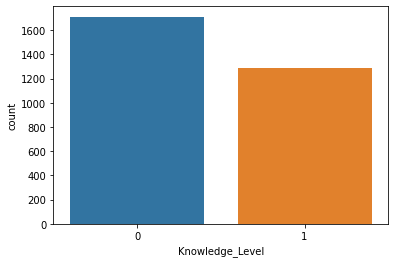

In [11]:
import seaborn as sns

sns.countplot(x = "Knowledge_Level", data = df)
df.loc[:,"Knowledge_Level"].value_counts()

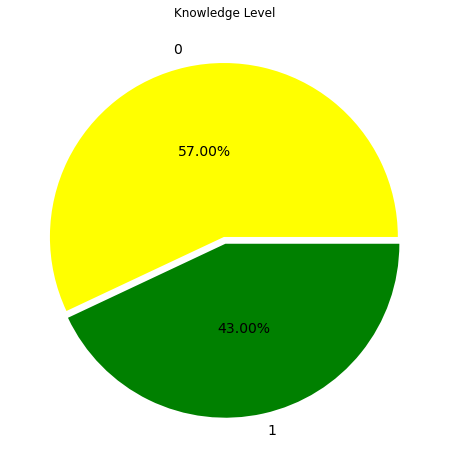

In [12]:
pie, ax = plt.subplots(figsize=[10,8])
labels = [0, 1]
colors = ['yellow', 'green']
plt.pie(x = df['Knowledge_Level'].value_counts(), autopct='%.2f%%', explode=[0.02]*2, labels=labels, pctdistance=0.5, textprops={'fontsize': 14}, colors = colors)
plt.title('Knowledge Level')
plt.show()

# Split data

In [13]:
X = df.drop(columns=['Knowledge_Level'], axis=1)
Y = df['Knowledge_Level']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [15]:
print(X.shape, x_train.shape, x_test.shape)

(3002, 8) (2401, 8) (601, 8)


# Modeling

### Membuat model training

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)

In [17]:
model = knn.fit(x_train, y_train)

# Evaluation

### Evaluasi model

In [18]:
x_train_predict = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_predict, y_train)

In [19]:
print('Akurasi data training : ', training_data_accuracy)

Akurasi data training :  0.9237817576009996


In [20]:
x_test_predict = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_predict, y_test)

In [21]:
print('Akurasi data testing : ', test_data_accuracy)

Akurasi data testing :  0.9151414309484193


# Model Prediksi

In [22]:
input_data = (1,1,0,1,0,1,0,1)
input_data_numpy = np.asarray(input_data)
data_reshaped = input_data_numpy.reshape(1, -1)
prediksi = model.predict(data_reshaped)
print(prediksi)

if (prediksi[0] == 0):
    print('Mulai Memahami Tentang Kekerasan Seksual Pada Anak')
else:
    print('Sudah Memahami Tentang Kekerasan Seksual Pada Anak')

[1]
Sudah Memahami Tentang Kekerasan Seksual Pada Anak


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


# Deployment

### Save Model

In [23]:
import pickle

filename = 'child_sexual.sav'
pickle.dump(model, open(filename, 'wb'))